In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Boston.csv")

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [4]:
housing['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [5]:
housing.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline
# this means to show the graphs in this window itself

In [7]:
# #For histogram plotting
# import matplotlib.pyplot as plt
# housing.hist(bins = 50, figsize = (20,15))

## Train-Test Splitting

In [8]:
#For learning 
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42) # so that the test data is not visible to the model ever, it sets the permutations as final once 
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train set: 404
 Rows in test set: 102



In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['chas']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set['chas'].value_counts()

0    95
1     7
Name: chas, dtype: int64

In [13]:
strat_train_set['chas'].value_counts()

0    376
1     28
Name: chas, dtype: int64

In [14]:
housing = strat_train_set

## Looking for correlations

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix['medv'].sort_values(ascending=False)

medv          1.000000
rm            0.679894
black         0.361761
zn            0.339741
dis           0.240451
chas          0.205066
Unnamed: 0   -0.223041
age          -0.364596
rad          -0.374693
crim         -0.393715
nox          -0.422873
tax          -0.456657
indus        -0.473516
ptratio      -0.493534
lstat        -0.740494
Name: medv, dtype: float64

In [17]:
# from pandas.plotting import scatter_matrix
# attributes = ["medv", "rm", "zn", "lstat"]
# scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='rm', ylabel='medv'>

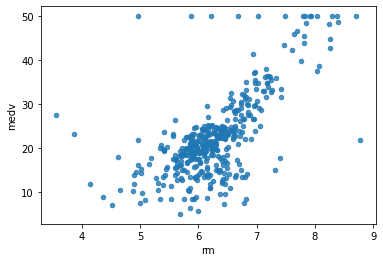

In [18]:
housing.plot(kind="scatter", x="rm", y="medv", alpha=0.8)

In [19]:
housing = strat_train_set.drop('medv', axis = 1)
housing_labels = strat_train_set['medv'].copy()

## Trying out Attribute combinations

In [20]:
# housing["taxrm"] = housing['tax']/housing['rm']

In [21]:
# housing["taxrm"]

## Missing Attributes

In [22]:
# To take care of missing attributes you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the attribute to some value(0, mean or median)

In [23]:
a = housing.dropna(subset=["rm"]) # Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(404, 14)

In [24]:
housing.drop("rm", axis = 1) # Option 2
# Notee that there is no rm column and also note that the original housing dataframe will remain unchanged

,Unnamed: 0,crim,zn,indus,chas,nox,age,dis,rad,tax,ptratio,black,lstat
254,255,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,349,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,477,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,322,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,327,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,156,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,424,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,99,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,456,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [25]:
median = housing["rm"].median() #Compute median for option 3

In [26]:
median

6.21

In [27]:
housing["rm"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [28]:
housing.describe() # before we started filling missing entries

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,251.551980,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,146.997898,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,124.750000,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,249.500000,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,382.250000,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,505.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [29]:
# Above cells which we used to deal with missing attributes can be solved by using the SimpleImputer class from sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.49500e+02, 2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00,
       5.38000e-01, 6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00,
       3.37000e+02, 1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
imputer.statistics_.shape

(14,)

In [32]:
# To fill the missing entries in whole data
X = imputer.transform(housing)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [34]:
housing.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,251.551980,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,146.997898,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,124.750000,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,249.500000,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,382.250000,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,505.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, there are three types of objects

1. Estimators - It estimates some parameter based on a dataset. Eg imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters.
2. Transformers - transfrom method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits then transforms.
3. Predictors - Linear Regression model is an example of predictor. fit and transform are two common functions. It also gives score() function which will evaluate the predictions

## Feature Scaling

Primarily, there are two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called as MinMaxScaler for this

2. Standardization
    (value - mean)/standard deviation
    Sklearn provides a class called StandardScaler for this(variance of the result becomes 1)

## Creating a Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    # .... add as many as you want
    ('std_scaler', StandardScaler()),
])
# Pipeline takes input a list of objects(estimators, transformers, predictors)
# Working
# first object(imputer in this case) applies fit and transform on the data then passes on the data to the next object
# the final object(std scaler in this case) applies fit only

In [36]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [37]:
housing_num_tr.shape

(404, 14)

## Selecting a desired model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# model = LinearRegression()
model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [39]:
some_data = housing.iloc[:5]

In [40]:
some_labels = housing_labels.iloc[:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [45]:
mse

0.0